Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [2]:
from sklearn.datasets import load_wine
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot: >

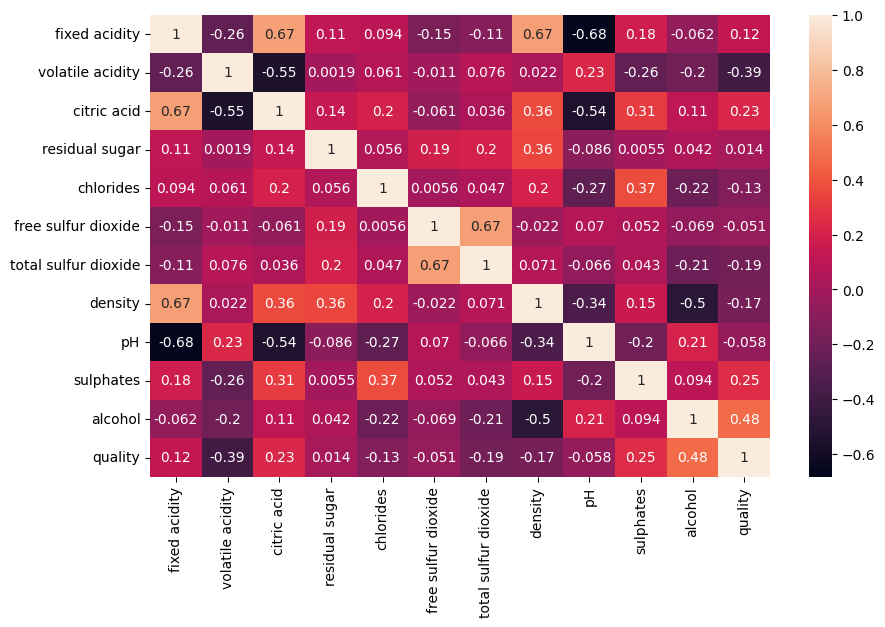

In [3]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)


Important features for quality are those who are corelted with quality is as follows :- alcohol, volatile acidity, sulphates and citric acid

Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Here we do not have any missing values , if missing values are there we will replace them by code df.dropna()
if the missing values are large we can replace it by mean, median or mode

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

In [5]:
df_std = pd.read_csv('stud.csv')
df_std

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


We can simply see the corelation between the independent features and dependent features, and the features which are highly corelated with dependent variable are chosen as key factors

First we need to convert categorical variable to numeric by one hot or lable encoding, then we have to combime all score to a mean score. then we can do corelation test.

In [6]:
df_std.isna().sum() # no missing values are there in data

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df_std.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

so we merge some high school with high school, associate degree with some college, and give ordinal encoding by ranking

In [8]:
# df_std['parental_level_of_education'] = df_std['parental_level_of_education'].apply(lambda x: 'high school' if 'school' in x else x)

now we can not decide whether we have to merge some college, associate and bachelor degree, so we ploy boxplot with final marks

In [9]:
df_std['final_marks'] = (df_std.math_score + df_std.reading_score + df_std.writing_score)/3

In [10]:
df_std

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,final_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

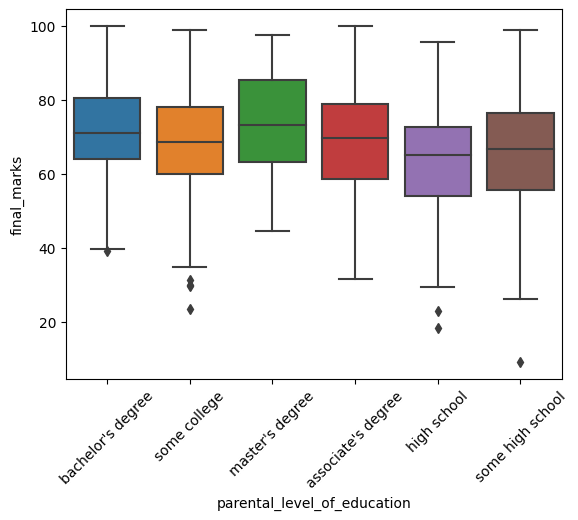

In [11]:
sns.boxplot(data=df_std, x=df_std.parental_level_of_education,   y=df_std.final_marks,)
plt.xticks(rotation=45)

In [12]:
df_std.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [13]:
df_std['parental_level_of_education'] = df_std['parental_level_of_education'].map({'high school':0, 'some high school':1 , 'some college':2, 'associate\'s degree' :3 , 'bachelor\'s degree':4, 'master\'s degree':5}) 



In [14]:
df_std.parental_level_of_education.value_counts()

2    226
3    222
0    196
1    179
4    118
5     59
Name: parental_level_of_education, dtype: int64

In [15]:
df_std.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [16]:
df_std.test_preparation_course.value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

In [17]:
df_std.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

as many features which needs one hot encoding, but as they have only 2 features, hence we can do ordinal encoding as 0,1, advantages is that the value will remain in one column, and we can easily se the corelations.

In [18]:
df_std['gender'] = df_std['gender'].map({'female':0, 'male':1}) 
df_std['lunch'] = df_std['lunch'].map({'free/reduced':0, 'standard':1}) 

df_std['test_preparation_course'] = df_std['test_preparation_course'].map({'none':0, 'completed':1}) 


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'group B'),
  Text(1, 0, 'group C'),
  Text(2, 0, 'group A'),
  Text(3, 0, 'group D'),
  Text(4, 0, 'group E')])

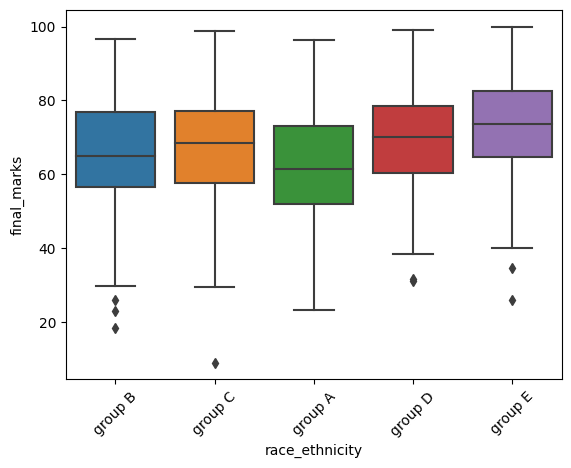

In [19]:
sns.boxplot(data=df_std, x=df_std.race_ethnicity,   y=df_std.final_marks,)
plt.xticks(rotation=45)

now we have to do one hot encoding with race_ethnicity as we dont know about its sequence but on observing the boxplot it is clear that the marks increase from A to E so we will do oridnal encoding

In [20]:
df_std['race_ethnicity'] = df_std['race_ethnicity'].map({'group A':0, 'group B':1,'group C':2,'group D':3,'group E':4,}) 

In [21]:
df_std.drop(['math_score','reading_score', 'writing_score'],axis=1, inplace=True)
df_std

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,final_marks
0,0,1,4,1,0,72.666667
1,0,2,2,1,1,82.333333
2,0,1,5,1,0,92.666667
3,1,0,3,0,0,49.333333
4,1,2,2,1,0,76.333333
...,...,...,...,...,...,...
995,0,4,5,1,1,94.000000
996,1,2,0,0,0,57.333333
997,0,2,0,0,1,65.000000
998,0,3,2,1,1,74.333333


In [22]:
df_std.corr()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,final_marks
gender,1.000000,-0.001502,-0.051255,0.021372,0.006028,-0.130861
race_ethnicity,-0.001502,1.000000,0.094115,0.046563,0.017508,0.185168
parental_level_of_education,-0.051255,0.094115,1.000000,-0.018780,0.031177,0.224117
lunch,0.021372,0.046563,-0.018780,1.000000,-0.017044,0.290064
test_preparation_course,0.006028,0.017508,0.031177,-0.017044,1.000000,0.256710
final_marks,-0.130861,0.185168,0.224117,0.290064,0.256710,1.000000


## important features in decending order are lunch, test_preparation_course, parental_level_of_education, race_ethnicity and gender

Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

Ans: we have to do one hot encoding for categorical variable not ranked like gender, lunch, test_preparation_course, but we found that they have only 2 categories hence ordianl encoding or 0,1 will also work well, 

In case of rece_ethnicity we found that the group ABCDE are in ranked order as we found its boxplot with final marks, hence we do ordinal encoding in this too.

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [23]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


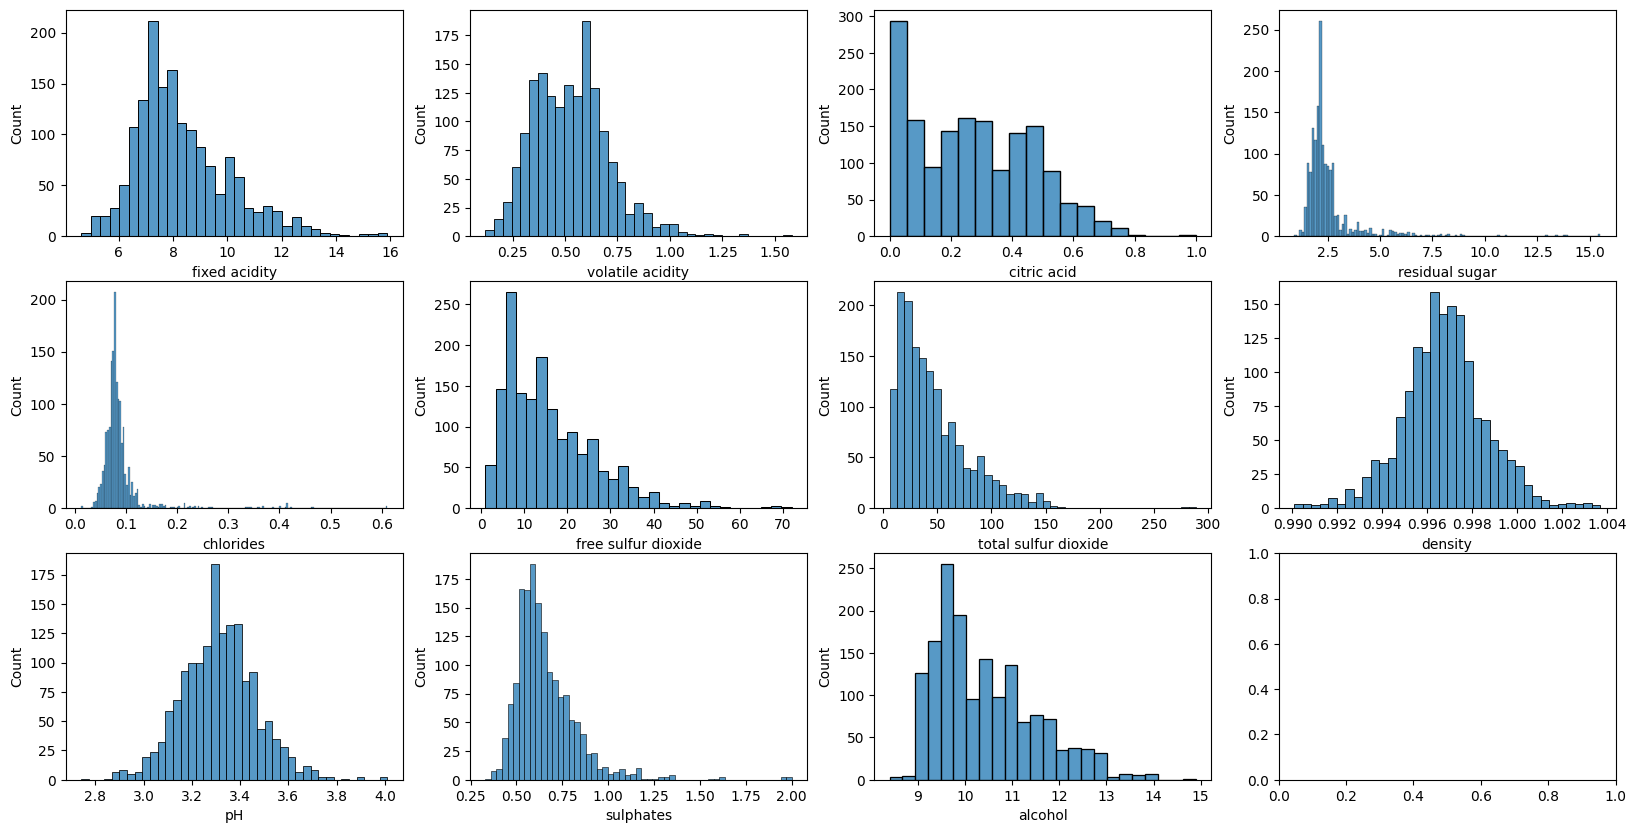

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
for idx, feature in enumerate(df.columns[:-1]):
    row = idx // 4
    col = idx % 4
    ax = axes[row, col]
    sns.histplot(data=df, x=feature, ax=ax)
plt.show()

# observations
we see that citric acid is not normally distributed : we will apply Box-Cox transformation.

residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohole are right skewed distributions. : we will apply Log transformation to make these distribution normal.

density and pH are normally distributed

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [25]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Split the data into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA to reduce the number of features
pca = PCA()
X_pca = pca.fit_transform(X)

# Determine the minimum number of principal components required to explain 90% of the variance
variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)
num_components = len(cumulative_variance_ratio[cumulative_variance_ratio <= 0.9])+1
print(f"Number of principal components required to explain above 90% of the variance: {num_components}")


Number of principal components required to explain above 90% of the variance: 7


In [26]:
cumulative_variance_ratio

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])